In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
from scipy.stats import zscore
import warnings
import baltic as bt
import os
warnings.simplefilter('ignore')

In [2]:
os.makedirs('../Figure/Supplementary Figure7', exist_ok=True)

# Load data

In [3]:
family = 'LTR5'

Dfam_RM = pd.read_csv('../data/TE/{}.annotation.csv'.format(family))
Dfam_RM.index = Dfam_RM['repeat name']
screening_result = pd.read_csv('../data/screening/{}_screening.csv'.format(family))
Lift_summary_df = pd.read_csv('../data/Liftover/{}_Liftover.csv'.format(family), index_col=0)
KZFP_df = pd.read_csv('../data/overlap/{}_KZFP.csv'.format(family))
tree = bt.loadNewick('../data/phylogenetic tree/{}_reroot.contree'.format(family))

screening_result

,repeat family name,KZFP gene symbol,subfamily1,subfamily2,difference of binding rate,decrease in younger subfamily?,adjusted p value,subfamily1 binding rate,subfamily2 binding rate,repeat class,repeat region,subfamily1 branch,subfamily2 branch,subfamily1 age,subfamily2 age,KZFP age
0,LTR5,ZNF614,LTR5B,LTR5A,0.109,decrease,0.0,0.119753,0.010753,ERV/LTR,LTR,Catarrhini,Hominoidea,29.4,20.2,105.0


In [4]:
# obtain TE targets
KZFP_target = pd.read_csv('../data/targets/TE_targets_for_analysis.csv')
KZFP_target = KZFP_target[KZFP_target['repeat family name']==family]
display(KZFP_target.head())

,KZFP gene symbol,repeat subfamily name,ratio,p value,q value,log10 q value,normalized score,rank,criteria,overlap peak count to all copies,...,repeat class,repeat classification,emergence era of TE subfamily,evolutionary age of TE subfamily,emegence era of TE subfamily is in primate,emergence era of KZFP for analysis,evolutionary age of KZFP for analysis,evolutionary age of KZFP in Imbeault et al.,evolutionary age of KZFP in Tribolet-Hardy et al.,emegence era of KZFP is in primate
128,ZNF792,LTR5B,11.259366,4.977437e-67,1.212836e-64,63.916198,0.199462,Secondary,True,99,...,ERV/LTR,ERV/LTR,Catarrhini,29.4,True,Boreoeutheria,96.0,97.5,96.0,False
167,ZNF766,LTR5,11.030819,4.586882e-31,2.235340e-29,28.650656,0.089228,Secondary,True,45,...,ERV/LTR,ERV/LTR,Hominoidea,20.2,True,Simiiformes,43.2,43.1,43.2,True
168,ZNF766,LTR5B,8.229233,3.696856e-29,1.689001e-27,26.772370,0.083378,Secondary,True,51,...,ERV/LTR,ERV/LTR,Catarrhini,29.4,True,Simiiformes,43.2,43.1,43.2,True
439,ZNF624,LTR5_Hs,74.812542,1.232522e-94,3.603893e-92,91.443228,0.285209,Secondary,True,64,...,ERV/LTR,ERV/LTR,Hominoidea,20.2,True,Eutheria,105.0,105.0,105.0,False
453,ZNF614,LTR5B,12.200420,1.306265e-82,6.365863e-80,79.196143,0.478080,Secondary,True,117,...,ERV/LTR,ERV/LTR,Catarrhini,29.4,True,Eutheria,105.0,105.0,105.0,False


# Process data

In [5]:
# filtering
KZFP_df_fil = KZFP_df[KZFP_df['KZFP gene symbol'].isin(pd.unique(KZFP_target['KZFP gene symbol']))]

In [6]:
# color
color_subfamily_dict = dict()
color_name_dict = dict()

color_list = ['red', 'blue', 'green', 'purple', 'orange', 'yellow', 'brown', 'pink']
branch_list = ['Vertebrata', 'Tetrapoda', 'Amniota', 'Mammalia', 'Theria', 'Eutheria', 'Boreoeutheria', 'Euarchontoglires', 'Primatomorpha', 
               'Primates', 'Haplorrhini', 'Simiiformes', 'Catarrhini', 'Hominoidea', 'Hominidae', 'Homininae', 'Hominini']

subfamily_list = ['LTR5B', 'LTR5A', 'LTR5', 'LTR5_Hs']


for i, (subfamily, color) in enumerate(zip(subfamily_list, color_list)):

    color_subfamily_dict[subfamily] = color

        
for i, (subfamily, name) in enumerate(Dfam_RM[['repeat subfamily name', 'repeat name']].values):

    color_name_dict[name] = color_subfamily_dict[subfamily]

c_func = lambda x: color_name_dict[x.name] if x.name in color_name_dict.keys() else 'black'

# Supplementary Fig.7A

In [7]:
# obtain binding profile
crosstab = pd.crosstab(KZFP_df_fil['repeat name'], KZFP_df_fil['KZFP gene symbol'])
Dfam_RM_KZFP = pd.concat([Dfam_RM, crosstab>=1], axis=1)
Dfam_RM_KZFP = Dfam_RM_KZFP[Dfam_RM_KZFP['repeat name'].isna()==False]
Dfam_RM_KZFP = Dfam_RM_KZFP.fillna(False)

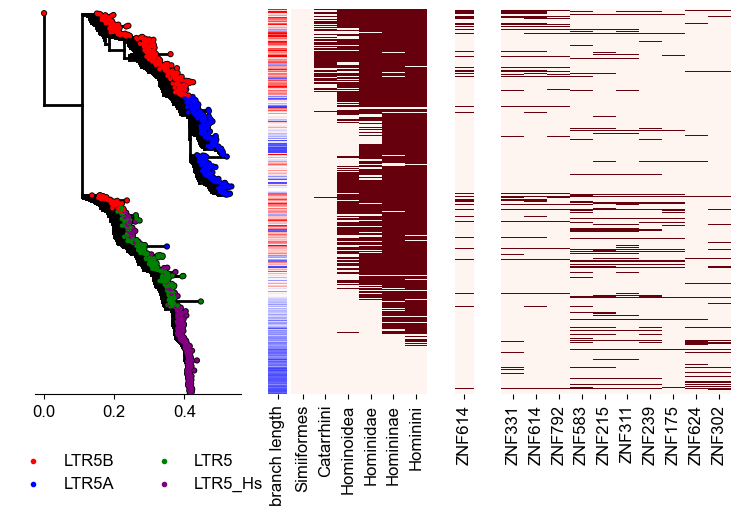

In [8]:
# visualize phylogenetic tree

fig = plt.figure(figsize=[15, 5])
gs = GridSpec(20, 50)
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 12

ax = plt.subplot(gs[:, :9])
i = 10

tree.plotTree(ax) ## plot branches
tree.plotPoints(ax, colour=c_func, size=10, zorder=100) ## plot circles at tips

ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

[ax.spines[loc].set_visible(False) for loc in ['top','right','left']]

ax.tick_params(axis='y',size=0)
ax.set_yticklabels([])
ax.set_ylim(-2,tree.ySpan+10)
ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[1])

# Legend
legend_elements = []
name_list = subfamily_list
for name, color in zip(name_list, color_list):
    p = ax.scatter([-1], [-1], marker='.', label=name, color=color)

ax.legend(loc=[-0.12 ,-0.27], ncol=2, fontsize=12, frameon=False)

# branch length
ax = plt.subplot(gs[:, i])
i += 1

data = zscore(Dfam_RM.loc[reversed(Dfam_RM_KZFP.index)]['branch length'].to_frame())
sns.heatmap(data, cmap='bwr', vmin=-2, center=0, vmax=2, cbar=False, ax=ax)

ax.set_xticklabels(['branch length'], rotation=90)
ax.set_yticklabels('')
ax.set_ylabel('')
ax.tick_params(left=False)


# Liftover
branch = branch_list[-6:] 

ax = plt.subplot(gs[:, i:i+len(branch)])
i += len(branch)

data = Lift_summary_df[branch].loc[reversed(Dfam_RM_KZFP.index)]
sns.heatmap(data, cmap='Reds', cbar=False, ax=ax)
ax.set_yticklabels('')
ax.set_ylabel('')
ax.tick_params(left=False)

# binding profile of KRAB-ZFPs eveded by TE
KRAB_list = pd.unique(screening_result['KZFP gene symbol'])
KRAB_list = ['ZNF614']

ax = plt.subplot(gs[:, i+1:i+len(KRAB_list)+1])
i += len(KRAB_list) + 1

data = Dfam_RM_KZFP[KRAB_list].loc[reversed(Dfam_RM_KZFP.index)]
sns.heatmap(data, cmap='Reds', cbar=False, ax=ax)
ax.set_xticklabels(KRAB_list, rotation=90)
ax.set_yticklabels('')
ax.set_ylabel('')
ax.tick_params(left=False)


# other KRAB-ZFPs
KRAB_list = pd.unique(KZFP_target[KZFP_target['log10 q value']>=50]['KZFP gene symbol'])
order = Dfam_RM_KZFP[['repeat subfamily name'] + KRAB_list.tolist()].groupby(by='repeat subfamily name').mean().T.sort_values(by=['LTR5B', 'LTR5A', 'LTR5', 'LTR5_Hs'], ascending=False)


ax = plt.subplot(gs[:, i+1:i+len(KRAB_list)+1])
i += len(KRAB_list) + 1

data = Dfam_RM_KZFP[order.index].loc[reversed(Dfam_RM_KZFP.index)]
sns.heatmap(data, cmap='Reds', cbar=False, ax=ax)
ax.set_yticklabels('')
ax.set_ylabel('')
ax.tick_params(left=False)

plt.rcParams["font.family"] = "Arial"
fig.savefig('../Figure/Supplementary Figure7/Supplementary Figure7A.png', bbox_inches='tight', dpi=300)
plt.savefig('../Figure/Supplementary Figure7/Supplementary Figure7A.pdf', bbox_inches='tight', transparent=True, dpi=300)
